# 🌠 [Day 4](https://adventofcode.com/2019/day/4)

In [1]:
def next_password(n):
    """Given integer n, returns the first integer that meets the password 
    criterion and is strictly larger than n.
    The criterion is:
        - increasing digits
        - at least one repetition of at least two consecutive numbers
    """
    repeat = False
    digits = list(map(int, "%06d" % (n + 1)))
    next_digits = [max(1, digits[0])]
    # Build the smallest integer that follows the non-decreasing criterion
    for i, d in enumerate(digits[1:]):
        if d <= next_digits[i]:
            repeat = True
            next_digits.append(next_digits[i])
        else:
            next_digits.append(d)
            
    # If there was no repetition so far, change the two last digits 
    # (smallest number) accordingly
    if not repeat:
        if next_digits[-1] > next_digits[-2]:    # e.g. 59 -> 66
            next_digits[-2] += 1
        next_digits[-1] = next_digits[-2]  
    return int(''.join(map(str, next_digits)))


def next_password2(n):
    """Given integer n, returns the first integer that meets the password 
    criterion and is strictly larger than n.
    The criterion is:
        - increasing digits
        - at least one repetition of exactly two consecutive numbers
    """
    repeat = [] # stack new number if it repeats, unstack it if more than twice
    current_repeats = 1
    digits = list(map(int, "%06d" % (n + 1)))
    next_digits = [max(1, digits[0])]
    current = max(1, digits[0])
    for i, d in enumerate(digits[1:]):
        if d <= next_digits[i]:
            # If already two repetitions: remove
            if len(repeat) and repeat[-1] == next_digits[i]:
                repeat = repeat[:-1]
            # If not already repeated: add
            elif current_repeats < 2:
                repeat.append(next_digits[i])
            next_digits.append(next_digits[i])
            current_repeats += 1
        else:
            next_digits.append(d)
            current_repeats = 1
            
    # If there was no repetition of length exactly so far, change the two 
    # last digits accordingly
    if not len(repeat):
        # First case: there are different, same as before
        if next_digits[-1] != next_digits[-2]:
            if next_digits[-1] > next_digits[-2]:
                next_digits[-2] += 1
            next_digits[-1] = next_digits[-2]  
        # Second case: there are the same in which case they must be part of 
        # a longer sequence
        else:
            # Edge case: solve via a recursive call
            if next_digits[-1] == 9:
                nxt =  int(''.join(map(str, next_digits)))
                return next_password2(nxt)
            # If this is a sequence of length 3, we only need to change the 
            # last digit to reduce it to length 2
            elif (next_digits[-3] == next_digits[-2] and 
                next_digits[-4] != next_digits[-3]):
                next_digits[-1] += 1
            # Otherwise we just modify the two last numbers so that they are 
            # repeating exactly twice
            else:
                next_digits[-2] += 1
                next_digits[-1] += 1
    return int(''.join(map(str, next_digits)))


def get_num_passwords(start, end, criterion=next_password):
    num = -1
    p = start - 1
    while p < end:
        num += 1
        p = criterion(p)
    return num

In [2]:
start = 382345
end = 843167

print("Number of passwords under the first criterion:", get_num_passwords(start, end))
print("Number of passwords under the second criterion:", get_num_passwords(
    start, end, criterion=next_password2))

Number of passwords under the first criterion: 460
Number of passwords under the second criterion: 290


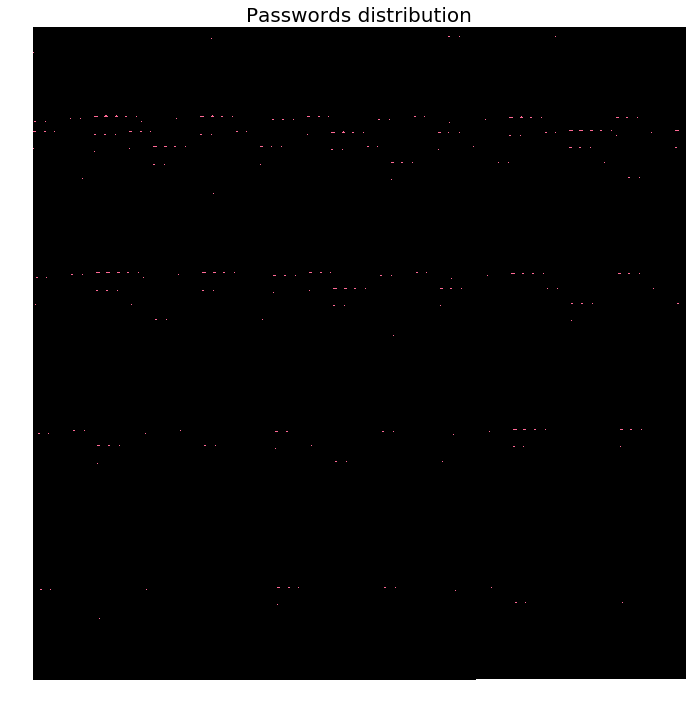

In [3]:
import numpy as np
from matplotlib import pyplot as plt

def plot_passwords_distribution(start, end, criterion=next_password):
    pwds = np.zeros((end - start + 1))
    p = criterion(start - 1)
    while p < end:
        pwds[p - start] = 1
        p = criterion(p)
    n = int(np.ceil(np.sqrt(pwds.shape[0])))
    m = pwds.shape[0] // n + 1
    pwds = np.pad(pwds, (0, m * n - pwds.shape[0]), constant_values=1.6, mode="constant")
    pwds = np.reshape(pwds, (n, m))
    plt.figure(figsize=(12, 12))
    plt.imshow(pwds, cmap="gnuplot2", origin="upper")
    plt.title("Passwords distribution", fontsize=20)
    plt.axis('off')
    plt.show()
    
plot_passwords_distribution(start, end)